In [11]:
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
import os
import matplotlib.pyplot as plt

In [51]:
test_data = r"D:\qing_research\1_flood_water\1_flood_water_network\data\Geo\flood\3_extract_all_dma_in_flood_sorted\20200201_20200309\Processed_Flow_DMA_422.csv"
output_dir = r"D:\qing_research\1_flood_water\1_flood_water_network\data\Geo\flood\3_extract_all_dma_in_flood_sorted\20200201_20200309"

In [52]:
data = pd.read_csv(test_data)
data['Time'] = pd.to_datetime(data['Time'])  

In [53]:
print(type(temp_data))

# Check for any remaining invalid values
print("NaN values before cleaning:", temp_data.isna().sum())
print("Mean value of temp_data:", temp_data.mean())

<class 'pandas.core.series.Series'>
NaN values before cleaning: 0
Mean value of temp_data: 1.5889460093267018


In [54]:
temp_data = data['Flow_l_s_'].replace([np.inf, -np.inf], np.nan)
temp_data = temp_data.fillna(temp_data.mean())  # Explicitly reassign after replacing

In [55]:
print("NaN values after cleaning:", temp_data.isna().sum())

NaN values after cleaning: 0


In [56]:
temp_data = temp_data.replace([np.inf, -np.inf], np.nan).fillna(temp_data.mean())
print("NaN values:", np.isnan(temp_data.values).sum())

NaN values: 0


In [57]:
# Initialize and fit the Kalman Filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kf = kf.em(temp_data.values, n_iter=10)
state_means, state_covariances = kf.smooth(temp_data.values)

In [58]:
# Fill only missing values with Kalman Filter's smoothed estimates
data['Filled_Flow_l_s_'] = data['Flow_l_s_']  # Start with original data
data.loc[data['Flow_l_s_'].isna(), 'Filled_Flow_l_s_'] = state_means[data['Flow_l_s_'].isna()]

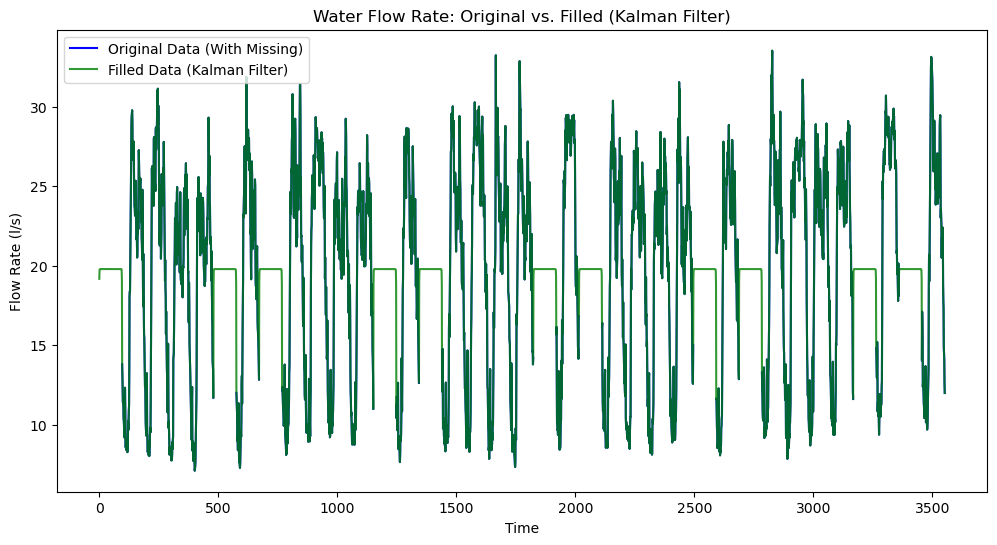

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Flow_l_s_'], label="Original Data (With Missing)", color="blue", alpha=1)
plt.plot(data.index, data['Filled_Flow_l_s_'], label="Filled Data (Kalman Filter)", color="green", alpha=0.8)
plt.legend()
plt.title("Water Flow Rate: Original vs. Filled (Kalman Filter)")
plt.xlabel("Time")
plt.ylabel("Flow Rate (l/s)")
plt.show()

In [49]:
output_dir = r"D:\qing_research\1_flood_water\1_flood_water_network\data\Geo\flood\2_extract_flood_date_waterflow\2023"

In [50]:
max_nan_file = None
max_nan_count = 0

# Iterate through all files in the directory
for file in os.listdir(output_dir):
    file_path = os.path.join(output_dir, file)
    
    # Check if it's a CSV file
    if file.endswith('.csv'):
        try:
            # Read the file
            data = pd.read_csv(file_path)
            
            # Count total NaN values in the file
            nan_count = data.isna().sum().sum()  # Total NaNs in the file
            
            # Update if this file has more NaNs than the current maximum
            if nan_count > max_nan_count:
                max_nan_count = nan_count
                max_nan_file = file
        
        except Exception as e:
            print(f"Error reading file {file}: {e}")

# Output the result
print(f"The file with the most NaN values is: {max_nan_file}")
print(f"Total NaN values in the file: {max_nan_count}")

The file with the most NaN values is: flood_573_20231020_20231023_422.csv
Total NaN values in the file: 12268
